Group: Isabella de Melo Sousa, 
Gabriel de Souza Oliva

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.datasets import make_blobs, make_circles
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from scipy.stats import multivariate_normal
import warnings
warnings.filterwarnings("ignore")

#%matplotlib notebook
plt.style.use('ggplot')

# TP n°2 : Support Vector Machine (SVM)

## Preliminary questions

**1)** Show that the primal problem solved by the SVM can be rewritten as follows :

$$ \text{argmin}_{\mathbf{w} \in \mathcal{H}, w_0 \in \mathbb{R} } \left( \frac{1}{2}||\mathbf{w}||^2 + C \sum_{i=1}^n [ 1 - y_i ( \langle \mathbf{w}, \Phi(\mathbf{x_i}) \rangle + w_0 )]_+ \right) $$

The primal problem can be formulated as a constrained optimization problem over w and $\xi$ as follows:

min  $ \frac{\left \|w  \right \|^2}{2} + C \sum_{i}^{n}\xi_i $ subject to $y_i(<w, \phi(x_i) > + w_0) \geq 1 - \xi_i $ and $\xi_i \geq 0$ , i=1,...,n

The constraint $y_i(<w, \phi(x_i) > + w_0) \geq 1 - \xi_i$ together with $\xi_i \geq 0$, is equivalent to $\xi_i = max(0, 1 - y_i(<w, \phi(x_i) > + w_0))$.

Hence the learning problem is equivalent to the unconstrained optimization problem over w:

min  $ \frac{\left \|w  \right \|^2}{2} + C \sum_{i}^{n}max(0, 1 - y_i(<w, \phi(x_i) > + w_0)) $ 

(regularization + loss function)

But $max(0, 1 - y_i(<w, \phi(x_i) > + w_0))$ is the same as $[1 - y_i(<w, \phi(x_i) > + w_0)]_{+}$

Therefore,

The primal problem solved by the SVM can be rewritten as follows :

$$ \text{argmin}_{\mathbf{w} \in \mathcal{H}, w_0 \in \mathbb{R} } \left( \frac{1}{2}||\mathbf{w}||^2 + C \sum_{i=1}^n [ 1 - y_i ( \langle \mathbf{w}, \Phi(\mathbf{x_i}) \rangle + w_0 )]_+ \right) $$

**2)** Explain the sentence : "an SVM minimizes the classification error using a convex upper bound". The function $x \rightarrow [1 - x]_+ = \text{max}(0, 1-x)$ is called *Hinge* (*charnière* en français). Explain the difference between the pivotal loss and the loss of binary classification.

By the previous question we can observe that the primal problem solved by the SVM consists in the min(regularization term + loss function). We can see that the regularization term $\frac{\left \|w  \right \|^2}{2}$ is a convex function and that the loss function (called hinge) is also a convex function (in fact the hinge loss represented by $[1 - y_i(<w, \phi(x_i) > + w_0)]_{+}$ is a convex upper bound on 0-1 loss). Since the sum of two convex functions is also a convex function it is possible to say that "an SVM minimizes the classification error using a convex upper bound".

The Pivotal loss uses Hinge function. If we substitute x in the function for $t.y$, we have that the pivotal loss plot is $(1-ty)$. Since the function is always lesser or equal than any line between two function points, the function is convex. The binary loss is equals to $1$ if $ty\leq0$ and $0$ otherwise. Given that, we have that pivotal loss is always greater or equal the binary loss.

## Linear SVM

**3)** Draw a i.i.d. sample from a mixture of two Gaussian distrtibutions : each class is a Gaussian with specific parameters. This time, use the function make_blobs available in sklearn.datasets library. Reserve 75% of the data for training and 25% for the test data.

In [2]:
centers=[(3,0),(3,3)]
stds=[1, 1]
X, y = make_blobs(centers=centers, cluster_std=stds, random_state=0)

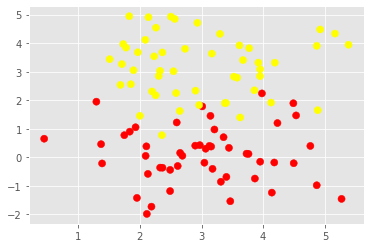

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

**4)** Since the probability distributions are known, numerically estimate the Bayes risk.

In [5]:
from scipy.stats import multivariate_normal
# Do a Monte-Carlo estimation of the Bayes Risk (given the gaussian distributions you used to generate data)

def n(x, centers=centers, stds=stds):
    p_minus1 = multivariate_normal.pdf(x=x, mean=centers[0], cov=stds[0])
    p_1 = multivariate_normal.pdf(x=x, mean=centers[1], cov=stds[1])
    return p_1/(p_minus1+p_1)

n_samples = 5000
miss_class = 0
for i in range(int(n_samples)):
    random_n = np.random.uniform(low=0, high=1)
    if random_n < 0.5:
        x = multivariate_normal.rvs(mean=centers[0], cov=stds[0])
        if n(x) >= 0.5:
            miss_class += 1
    else:
        x = multivariate_normal.rvs(mean=centers[1], cov=stds[1])
        if n(x) < 0.5:
            miss_class += 1

print(f'The Bayes Risk esmation was: {miss_class/n_samples*100}%')

The Bayes Risk esmation was: 6.98%


**5)** Draw the decision boundary H induced by SVM as well as the hyperplanes H1 and H−1. Vary the parameter C to see its impact on the number of support vectors. We can use the example https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html.

In [6]:
%matplotlib inline

In [7]:
def decision_boundary(X,y, kernel_type, C):
    # fit the model, don't regularize for illustration purposes
    clf = svm.SVC(kernel=kernel_type, C=C)
    clf.fit(X, y)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    print("Number of support vectors: ", len(clf.support_vectors_))
    plt.show()

Number of support vectors:  48


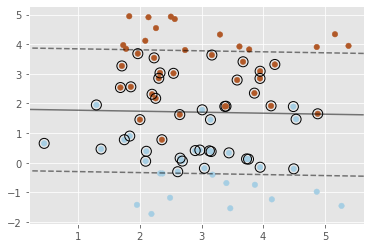

In [8]:
decision_boundary(X_train,y_train,'linear',0.01)

Number of support vectors:  14


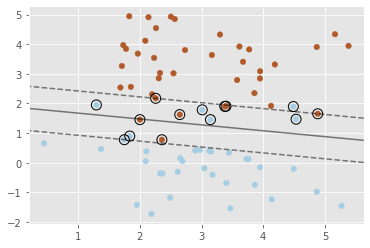

In [9]:
decision_boundary(X_train,y_train,'linear',1000)

Number of support vectors:  12


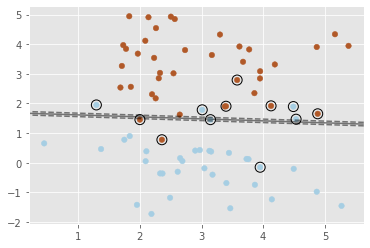

In [10]:
decision_boundary(X_train,y_train,'linear',10000000)

### Conclusion

As C increases, the margin is getting narrower:

— small C allows constraints to be easily ignored → large margin

— large C makes constraints hard to ignore → narrow margin

— C = ∞ enforces all constraints: hard margin

It is also possible to see that the number of support vectors decreases as C increases.

**6)** Define the Gaussian classes such that the two distributions overlap. Draw an i.i.d. sample from the joint probability distribution. Apply a 5-fold Cross-Validation to find the optimal parameter C∗ to classify this new dataset using a linear kernel.

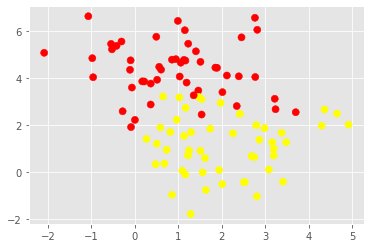

In [11]:
# Generate data and verify graphically that the two classes overlap
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [12]:
print("Fitting the classifier to the training set")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

list_c = list(np.logspace(-21, 21, num=42, base=2))
params = {'C': list_c }

clf = GridSearchCV(SVC(kernel='linear'), params)
clf = clf.fit(X_train, y_train)

Fitting the classifier to the training set


In [13]:
best_c = clf.best_params_['C']
print("Optimal C: ",best_c )

Optimal C:  249180.08916751613


Number of support vectors:  18


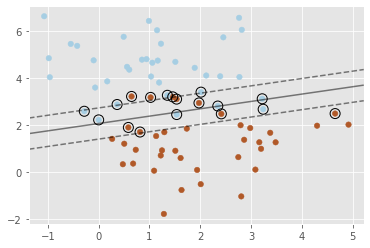

In [14]:
decision_boundary(X_train,y_train,'linear',best_c)

**7)** Show how tuning SVM hyperparameters on training data, for example by taking a Gaussian kernel (the parameters are therefore gamma and C), can lead to overfitting.

In [15]:
# Vary the parameter of the kernel and check the difference between training and testing scores
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

train_score = []
test_score = []

for c_value in list_c:
    clf = SVC(kernel='rbf', C=c_value).fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))

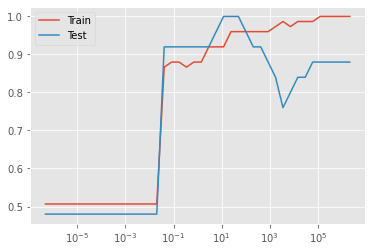

In [16]:
plt.xscale('log')
plt.plot(list_c, train_score, label='Train')
plt.plot(list_c, test_score, label='Test')
plt.legend()

As can be seem in the plot above, the blue line represents the training score while the orange line represents the test score. It's possible to notice that with the increase of C, the training score keeps increasing. The orange line increases, but after a moment, it starts to decrease. As the blue line doesnt decrease, it's noticeable that there's an overfitting.

## Non linear SVM

**8)** Define a new binary nonlinear classification problem : for instance, define one class as a Gaussian surrounded by the other chosen as a circle class, or choose the second class as a mixture of two Gaussian in such way that the separation problem is nonlinear. Generate a non-linearly separable dataset (we could for example use the function make_blobs available in sklearn.datasetslibrary ).

In [17]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(200, factor=.1, noise=.1)

**9)** Use an SVM with a Gaussian kernel then a polynomial (with well-adapted parameters) then plot the decision boundaries of these algorithms on separate graphs.

Number of support vectors:  196


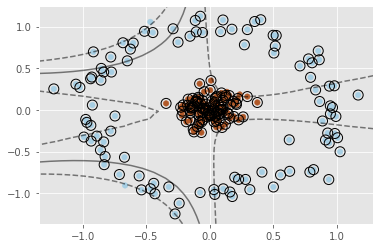

In [18]:
decision_boundary(X,y, 'poly', 1E3)

Number of support vectors:  10


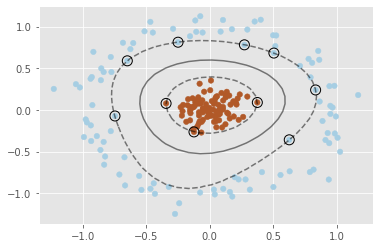

In [19]:
decision_boundary(X,y, 'rbf', 1E3)

**10)** We wish to compare classification performance between different SVMs based on different kernels
(linear, polynomial and Gaussian). Propose a method allowing to compare these three algorithms.

It is possible to use GridSearch to specify all the kernels we want to compare and also all the parameters. It has attributes that allows to analyse the performance of each combination of parameters.

**11)** Draw the learning curve of the algorithm : with fixed hyper-parameters and fixed test set, calculate the training and test errors by using training sub-sets of training data of various sizes (drawn randomly). Plot the train and test error based on the size of the train set subset. Estimate and display the accuracy of the Bayes predictor on the same graph. Comment.

In [20]:
import random
res = np.array(random.sample(range(2, 75), 30))

train_score = []
test_score = []

for size in res:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = size/100, test_size = 0.25, random_state = 0)
    clf = SVC(kernel='rbf', C=2**-3).fit(X_train, y_train)
    train_score.append(1-clf.score(X_train, y_train))
    test_score.append(1-clf.score(X_test, y_test))

In [21]:
results = pd.DataFrame()
results['size'] = res
results['training'] = train_score
results['test'] = test_score
results = results.set_index('size', drop=True)
results = results.sort_index()

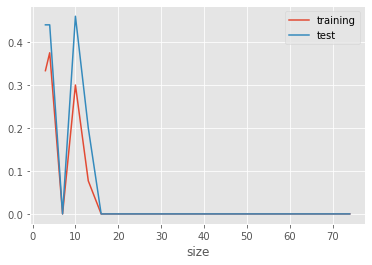

In [22]:
results.plot()

In [23]:
# Do a Monte-Carlo estimation of the Bayes Risk (given the gaussian distributions you used to generate data)


In [24]:
# Add this estimation to the plot of train/test error



**12)** Add noise to the dataset by randomly modifying the labels of some training data. Then, draw the complexity curves of the algorithm : with set train and test set, draw the train and test error as a function of the complexity (i.e. as a function of the value of the hyper-parameter controlling the complexity, or the number of support vector). Comment.


In [25]:
# Modify the class of some data points randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [26]:
positions = random.sample(range(0, len(y_train)), int(len(y_train)*0.15))

In [27]:
y_train

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [28]:
for i in positions:
    if y_train[i]==0:
        y_train[i]=1
    else:
        y_train[i]=0

In [29]:
y_train

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [30]:
train_score = []
test_score = []

list_c = list(np.logspace(-21, 21, num=100, base=2))

for c_value in list_c:
    clf = SVC(kernel='rbf', C=c_value).fit(X_train, y_train)
    train_score.append(1-clf.score(X_train, y_train))
    test_score.append(1-clf.score(X_test, y_test))

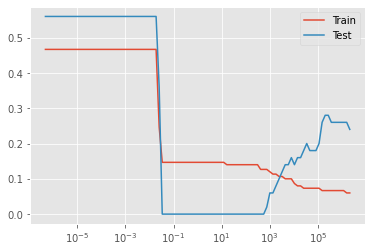

In [31]:
plt.xscale('log')
plt.plot(list_c, train_score, label='Train')
plt.plot(list_c, test_score, label='Test')
plt.legend()

As the complexity increases, it's noticeable that the train error keeps droping. However, for the test data, it drops for a moment and after it starts to increase again. The model starts to get overfitted.

## SVM GUI

**13)** Start the script svm_gui.py available at the link : http://scikit-learn.org/stable/auto_
examples/applications/svm_gui.html
This application allows real-time evaluation of the impact the choice of the kernel and the regula-
rization parameter C.

To do this the command "python3 svm_gui.py" was written in a terminal (Linux enviroment)

**14)** Generate a very unbalanced data set with much more points in one class than in the other (at least
90% vs 10%)

It was generated a dataset with 100 points, 90 in one class and 10 in the other.

**15)** Using a linear kernel and decreasing the parameter C what do you observe ?

This phenomenon can be corrected in practice by weighting more errors on the lesser class (parameter class_weight de SVC) or by a re-calibration technique (used with
SVC(..., probability=True)).

It is possible to observe that the accuracy of the model increases as the value of C descreases, but after the optimal value of C is reached, the accuracy starts to decrease again.

The prints of the exercise are in the following link:
https://drive.google.com/drive/folders/1z_PxxHxqJLe4fYGhG_3JzxdR7a90hGSj?usp=sharing

## Going further : application to face classification

Code for downloading and organizing the data:

In [2]:
###############################################################################
#               Face Recognition Task
###############################################################################
"""
The dataset used in this example is a preprocessed excerpt
of the "Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  _LFW: http://vis-www.cs.umass.edu/lfw/

"""

from time import time
import pylab as pl
from sklearn.datasets import fetch_lfw_people


####################################################################
# Download the data (if not already on disk); load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                              color=True, funneled=False, slice_=None,
                              download_if_missing=True)
# data_home='.'

# introspect the images arrays to find the shapes (for plotting)
images = lfw_people.images / 255.
n_samples, h, w, n_colors = images.shape

# the label to predict is the id of the person
target_names = lfw_people.target_names.tolist()

####################################################################
# Pick a pair to classify such as
names = ['Tony Blair', 'Colin Powell']
# names = ['Donald Rumsfeld', 'Colin Powell']

idx0 = (lfw_people.target == target_names.index(names[0]))
idx1 = (lfw_people.target == target_names.index(names[1]))
images = np.r_[images[idx0], images[idx1]]
n_samples = images.shape[0]
y = np.r_[np.zeros(np.sum(idx0)), np.ones(np.sum(idx1))].astype(np.int)

####################################################################
# Extract features

# features using only illuminations
X = (np.mean(images, axis=3)).reshape(n_samples, -1)

# # or compute features using colors (3 times more features)
# X = images.copy().reshape(n_samples, -1)

# Scale features
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

####################################################################
# Split data into a half training and half test set
# X_train, X_test, y_train, y_test, images_train, images_test = \
#    train_test_split(X, y, images, test_size=0.5, random_state=0)
# X_train, X_test, y_train, y_test = \
#    train_test_split(X, y, test_size=0.5, random_state=0)

indices = np.random.permutation(X.shape[0])
train_idx, test_idx = indices[:int(X.shape[0] / 2)], indices[int(X.shape[0] / 2):]
X_train, X_test = X[train_idx, :], X[test_idx, :]
y_train, y_test = y[train_idx], y[test_idx]
images_train, images_test = images[train_idx, :, :, :], images[test_idx, :, :, :]

**16)** By modifying the followind code, show the influence of the regularization parameter. For example, the prediction error can be displayed as a function of C on a logarithmic scale between 1e5 and 1e-5.

Fitting the classifier to the training set
Predicting the people names on the testing set


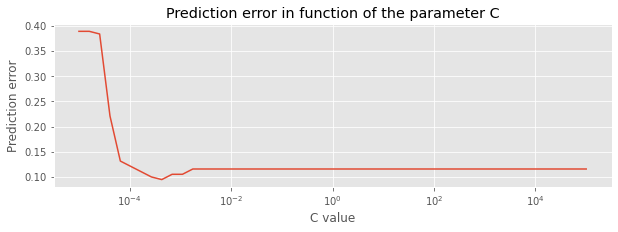

In [3]:
####################################################################
# Quantitative evaluation of the model quality on the test set
print("Fitting the classifier to the training set")
print("Predicting the people names on the testing set")
print("========================================================")

list_c = list(np.logspace(-5, 5))
pred_error = []
delta_t = []

for c_value in list_c:
    clf = SVC(kernel='linear', C=c_value).fit(X_train, y_train)
    t0 = time()
    # predict labels for the X_test images
    y_pred = clf.predict(X_test)
    delta_t.append(time()-t0)
    pred_error.append(1-clf.score(X_test, y_test))

plt.figure(figsize=(10, 3))
plt.plot(list_c, pred_error)
plt.xscale('log')
plt.title('Prediction error in function of the parameter C')
plt.xlabel('C value')
plt.ylabel('Prediction error')
plt.show()

In [4]:
print("Time: ", delta_t)

Time:  [0.7150509357452393, 0.7011306285858154, 0.786895751953125, 0.7570288181304932, 0.7130954265594482, 0.7038829326629639, 0.6771769523620605, 0.6154079437255859, 0.576512336730957, 0.5355856418609619, 0.5991733074188232, 0.5226423740386963, 0.4996638298034668, 0.5784506797790527, 0.5236380100250244, 0.5166199207305908, 0.564542293548584, 0.5743725299835205, 0.5754642486572266, 0.5963540077209473, 0.5914714336395264, 0.5734663009643555, 0.5788559913635254, 0.5874359607696533, 0.5983493328094482, 0.5893726348876953, 0.6043448448181152, 0.5944643020629883, 0.5864837169647217, 0.5804667472839355, 0.5655052661895752, 0.5544688701629639, 0.5674774646759033, 0.5734536647796631, 0.5605044364929199, 0.5644402503967285, 0.5565629005432129, 0.5943624973297119, 0.573462963104248, 0.5724184513092041, 0.5674295425415039, 0.586432695388794, 0.5275485515594482, 0.5914545059204102, 0.5924582481384277, 0.5863783359527588, 0.5684268474578857, 0.5883674621582031, 0.5894277095794678, 0.589372634887695

It is possible to observe that as C increases the prediction error decreases until reaches a constant value.

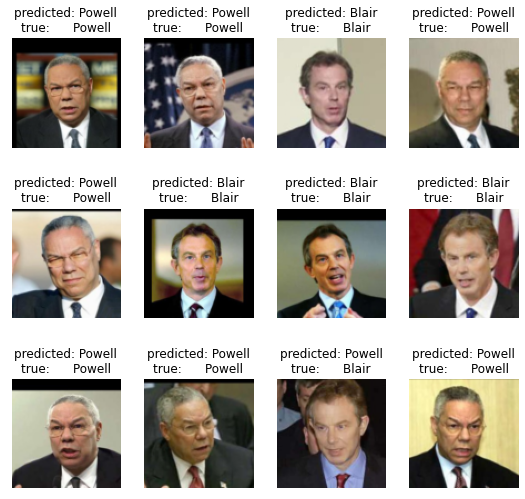

In [5]:
####################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90,
                       hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i])
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())


def title(y_pred, y_test, names):
    pred_name = names[int(y_pred)].rsplit(' ', 1)[-1]
    true_name = names[int(y_test)].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred[i], y_test[i], names)
                     for i in range(y_pred.shape[0])]

plot_gallery(images_test, prediction_titles)
pl.show()

**17)** By adding nuisance variables, thus increasing the number of variables to the number of learning
points fixed, show that performance drops.

In [ ]:
n_nuis_var_array = np.linspace(0, 1000, 20)

pred_error = []
clf = svm.SVC(kernel="linear", C=0.001)

for n_nuis_var in n_nuis_var_array:
    n_nuis_var = int(n_nuis_var)
    X_train_disturbed = np.concatenate((X_train,
                                  np.random.randn(X_train.shape[0], n_nuis_var)),
                                 axis=1)

    X_test_disturbed = np.concatenate((X_test,
                                 np.random.randn(X_test.shape[0], n_nuis_var)),
                                axis=1)
    
    clf.fit(X_train_disturbed, y_train)
    pred_error.append(1-clf.score(X_test_disturbed, y_test))


plt.figure(figsize=(10, 3))
plt.plot(n_nuis_var_array, pred_error)
plt.xscale('log')
plt.title('Prediction error in function of the number of nuisance variables')
plt.xlabel('Number of nuisance variables')
plt.ylabel('Prediction error')
plt.show()

**18)** Explain why the features are centered and reduced.

The idea is that the faces across the dataset should be centered in the image and also scaled such that the size of the faces are approximately identical. This prior "data normalization" implies in a higher accuracy from the face recognition model. This occurs because our face have several features that can be identified and the idea is to get a map of points that surround each one of them.

**19)** What is the effect of choosing a non-linear RBF kernel on prediction? You will be able to improve the prediction with a reduction of dimension based on the object sklearn.decomposition.RandomizedPCA.

The idea behind PCA is to create new features by extracting the important information and dropping the least important ones. In this way, our information will not be lost and we will have reduced features, and there will be fewer chances of overfitting our model.

In [ ]:
from sklearn.decomposition import PCA as RandomizedPCA

n_components = 50 # number of features
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)

# Use of PCA’s transform on both X_train and X_test to reduce the dimensionality.
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Fitting the SVM model

print("Fitting the classifier to the training set")
params = {
         'C': list(np.logspace(-21, 21, num=42, base=2)),
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }

clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), params)
clf = clf.fit(X_train_pca, y_train)
print("Best estimator found by grid search: ",clf.best_estimator_ )

In [ ]:
clf = SVC(kernel='rbf', C=clf.best_params_['C'], gamma = clf.best_params_['gamma'])
clf.fit(X_train_pca , y_train)

print("Predicting the people names on the testing set")
t0 = time()

# predict labels for the X_test images
y_pred = clf.predict(X_test_pca)

print("done in %0.3fs" % (time() - t0))
print("Chance level : %s" % max(np.mean(y), 1. - np.mean(y)))
print("Accuracy : %s" % clf.score(X_test_pca, y_test))

In [ ]:
####################################################################
# Qualitative evaluation of the predictions using matplotlib
plot_gallery(images_test, prediction_titles)
pl.show()

It is possible to observe that PCA + SVM is a much faster algorithm than before (+-100 times faster) and with a high accuracy score.